In [1]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
def draw(x):
    plt.imshow(x)
    plt.colorbar()
    plt.show()
    
def error(X, Y):
    

In [3]:
import numpy as np
import cahnHillSolver as ch
import mks_localisation
import primitive 
import legendre
import pymks

In [4]:
np.random.seed(10)
X = (np.random.random((50,50))>0.5).astype(int)
X_test = primitive.primitive_basis(X, domain=(0,1), n_states=2)
prim_basis = pymks.PrimitiveBasis(n_states=2)
X_ground = prim_basis.discretize(X)
assert(np.allclose(X_test, X_ground))

In [7]:
x_data = np.array([[[1, 1, 0],
                    [1, 0 ,2],
                    [0, 1, 0]]])
assert(x_data.shape == (1, 3, 3))
x_test = np.array([[[[0, 1, 0],
                     [0, 1, 0],
                     [1, 0, 0]],                   
                    [[0, 1, 0],
                     [1, 0, 0],
                     [0, 0, 1]],
                    [[1, 0, 0],
                     [0, 1, 0],
                     [1, 0, 0]]]])
x_prim = primitive.primitive_basis(x_data, domain=(0,2), n_states=3)

prim_basis = pymks.PrimitiveBasis(n_states=3)

assert(np.allclose(x_test, prim_basis.discretize(x_data)))
assert(np.allclose(x_test, x_prim))

In [8]:
%%time
X_train, y_train = ch.make_dataset(seed=99, tsteps=10, shape=(200,51,51), dx=0.1, dt=1e-2, gamma=1.)
X_test, y_test   = ch.make_dataset(seed=81, tsteps=10, shape=(10,51,51), dx=0.1, dt=1e-2, gamma=1.)

CPU times: user 1.49 s, sys: 28 ms, total: 1.52 s
Wall time: 1.51 s


In [23]:
X_t3, y_t3   = ch.make_dataset(seed=33, tsteps=30, shape=(10,51,51), dx=0.1, dt=1e-2, gamma=1.)
X_t5, y_t5   = ch.make_dataset(seed=57, tsteps=50, shape=(10,51,51), dx=0.1, dt=1e-2, gamma=1.)

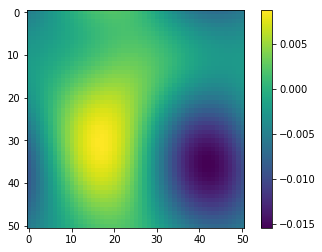

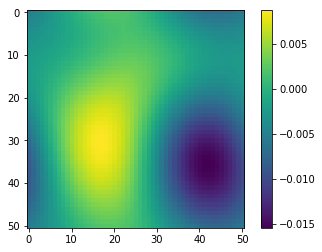

CPU times: user 3.15 s, sys: 172 ms, total: 3.32 s
Wall time: 2.34 s


In [11]:
%%time
n_states_ = 10
domain_   = (-1, 1)
disc      = legendre.legendre_basis
# disc      = primitive.primitive_basis
train_samples = 200
coeff_    = mks_localisation.fit(X=X_train[:train_samples,:,:], y=y_train[:train_samples,:,:], domain=domain_, n_states=n_states_, discretize=disc)
y_predict = mks_localisation.predict(X=X_test, coeff=coeff_, domain=domain_, n_states=n_states_, discretize=disc)
draw(y_test[3])
draw(y_predict[3])

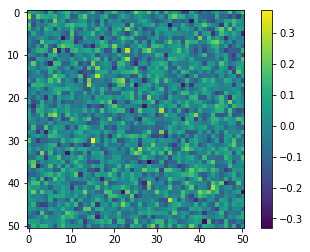

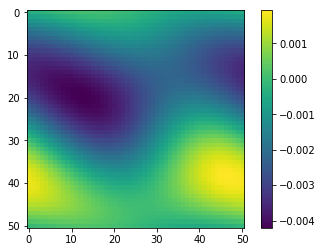

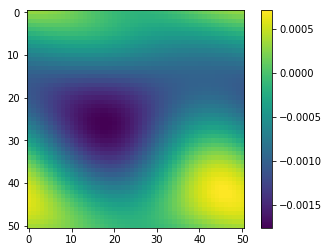

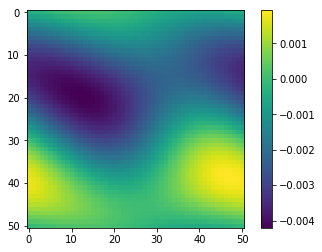

In [31]:
y_p3 = mks_localisation.predict(X=X_t3, coeff=coeff_*coeff_*coeff_, domain=domain_, n_states=n_states_, discretize=disc)
draw(X_t3[8])
draw(y_t3[8])
draw(y_p3[8])

y_p3_ = X_t3.copy()
for i in range(3):
    y_p3_ = mks_localisation.predict(X=y_p3_, coeff=coeff_, domain=domain_, n_states=n_states_, discretize=disc)


draw(y_p3_[8])